# Part I - Using R To Analyze Data

Download the following file (https://www.dropbox.com/s/zjf0lm830wzmkwz/snmp-delta.csv?dl=0), which contains the following as table as comma-separated values.

here are a total of 8 columns of data. You should be able to read the data into R using the provided commands below.

These are measurements in packets per interval and bytes per interval for specific interfaces on the router from the prior assignment, ideally structured as a notebook. For this assignment, you're going to hand in an "R Program" that shows how you analyzed the data. 

You should hand in a single PDF document with your answers to the questions, including any graphics needed. R can produce plots of graphs (described below) -- if you don't or can't use the notebook form (which will include the plots directly), you should be able to suck the plots into OpenOffice or other word processing tools.

In [1]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/zjf0lm830wzmkwz/snmp-delta.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
snmpData = read.csv(temporaryFile)
snmpData

,sample,if.,outUCastPkts,inOctets,outOctets,inUcastPkts,outNUCastPkts,inNUcastPkts
1,0,1,0,0,0,0,0,0
2,0,2,672,184683,90820,2226,0,0
3,0,3,96,116273,14370,866,0,0
4,0,6,119,97039,16290,751,0,0
5,0,7,678,149297,92040,2201,0,0
6,0,9,0,0,0,0,0,0
7,0,10,1621,0,142038,0,0,0
8,0,11,1621,0,142038,0,0,0
9,1,1,0,0,0,0,0,0
10,1,2,376,143765,52072,1619,0,0


### Problem #1
**Data Manipulation**: Show how to compute a table that contain the sum of all packets (input and outputt, unicast and non-unicast) for each interface and the sum of bytes (input and outputt, unicast and non-unicast) for each interface for each output link. The table should have a total of 3 columns (interface, packets, bytes) and a row for each interface. 

Refer to "slices" on page 5 and 6 of the SimpleR manual and the **data.frame** function to construct a data frame from vectors. In my solution, I defined functions that sliced the data for a specific interface and then used **sapply** to compute the data for all interfaces.

In [3]:
interface <- unique(snmpData$if.)
packets <- sapply(interface,function(x){sum(snmpData[snmpData$if.==x,c(3,6,7,8)])})
bytes <- sapply(interface,function(x){sum(snmpData[snmpData$if.==x,c(4,5)])})
data.frame(interface,packets,bytes)

,interface,packets,bytes
1,1,0,0
2,2,39054,3946320
3,3,17027,2493713
4,6,15260,2186780
5,7,37306,3340889
6,9,0,0
7,10,19793,1833765
8,11,19793,1833765


### Problem #2
**Summary Statistics**: Using the data for the inUcastPkts packets on interface #2, show how you would use R to compute the mean, variance, standard deviation and COV "by hand". For example, if you had read the data into data frame x, you could compute the sum of the first column using a **sum** over the slice of the inUcastPkts for interface 2, and then use this to compute the mean. You should  compute these terms using e.g. sum(), length() and other functions following the computations in the textbook. Your solution should show both the formulas and their output.

It will be easiest to first extract the data you are working on to a vector that you use in the remainder of your calculations.

In [5]:
dat = snmpData[snmpData$if.==2,"inUcastPkts"]
dat
mean <- sum(dat)/length(dat)
mean
variance <- sum((dat-mean)^2)/(length(dat)-1)
variance
sd <- sqrt(variance)
sd
COV <- standarddeviation/mean
COV

[1] 2226 1619 1805 1673 1506 1011 1243 1907 1197 1448 1409 2007 1738 2054 1118
[16] 1103 1114 2113 1189

[1] 1551.579

[1] 143837.9

[1] 379.2597

[1] 0.2444347

### Problem #3
**R Bulit-in**: Use the built-in R commands (see the SimpleR manual) to compute the mean, variance, sd & COV for the other columns (I don't think there is a function for COV in R, so you will need to compute that by hand, or better yet, define an R function).


In [6]:
dat = snmpData[snmpData$if.==2,3:8]
column <- names(dat)
mean <- sapply(column,function(x){mean(dat[,x])})
variance <- sapply(column,function(x){var(dat[,x])})
sd <- sapply(column,function(x){sd(dat[,x])})
COV <- sapply(column,function(x){sd(dat[,x])/mean(dat[,x])})
data.frame(mean,variance,sd,COV)

,mean,variance,sd,COV
outUCastPkts,503.8947,84325.1,290.3878,0.5762867
inOctets,146131.2,1011585204,31805.43,0.2176498
outOctets,61569.84,782747504,27977.63,0.4544047
inUcastPkts,1551.579,151828.9,389.6523,0.2511328
outNUCastPkts,0,0,0,NaN
inNUcastPkts,0,0,0,NaN


### Problem #4
Plot histograms for the number of packets (input and output of all types) per interval on interfaces 2, 7, 10 and 11. You can arrange plots into a grid using the following commands:
```
  par(mfrow=c(2,2))
  plot(....)
  etc
  plot(...)
```

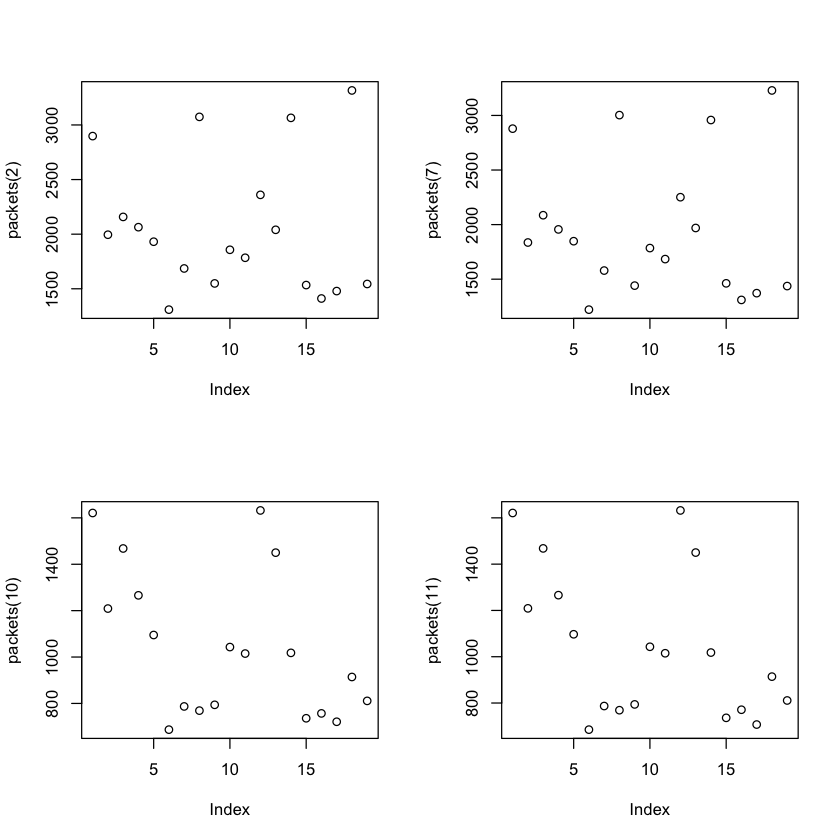

In [35]:
packets = function(x){
    iface = snmpData[snmpData$if.==x,]
    iface$outUCastPkts + iface$inUcastPkts + iface$outNUCastPkts + iface$inNUcastPkts
}
par(mfrow=c(2,2))
plot(packets(2))
plot(packets(7))
plot(packets(10))
plot(packets(11))


### Problem #5
Is the behavior across any of interfaces 2, 7, 10 and 11 correlated? In other words, are the number of packets sent on one link similar to the number of packets sent on another link? A similar property might be seen for the number of bytes. Use the "correlation" function (corr) across interfaces 2, 7, 10 and 11 for packets (as above) to argue what links have the most correlated behavior.

In [91]:
ifs = c(2,7,10,11)
pairs = expand.grid(ifs,ifs)
upairs = pairs[pairs[,1]<pairs[,2],]
rownames(upairs) = NULL
corr = function(x,y){cor(packets(x),packets(y))}
cdata = data.frame(upairs,correlation=apply(upairs,1,function(x) corr(x[1],x[2])))
cdata
max = cdata[which.max(cdata$correlation),]
rownames(max) = 'Best Correlation'
max

,Var1,Var2,correlation
1,2,7,0.9991045
2,2,10,0.3907492
3,7,10,0.3964814
4,2,11,0.390501
5,7,11,0.3962536
6,10,11,0.9998886


,Var1,Var2,correlation
Best Correlation,10,11,0.9998886


### Problem #6
Using the equations from Baudec (section 2.2.3), compute the confidence interval for the mean for the number of inUcastPkts packets  per interval on interface #2. You can use the built in commands in R to compute the mean and variance (or sd). Compute the 90 and 95% confidence intervals "by hand" (i.e. follow the equations in the text and don't use the built-in tests).

In [98]:
dat = snmpData[snmpData$if.==2,'inUcastPkts']
n = function(x) {qnorm((1+x)/2)} # this function appears in the text (slightly rearanged)
ci = function(conf,dist) { n(conf)*sd(dist)/sqrt(length(dist)) }
m = mean(dat)
data.frame(mean=m,low95=m-ci(.95,dat),high95=m+ci(.95,dat),low99=m-ci(.99,dat),high99=m+ci(.99,dat))
                 

,mean,low95,high95,low99,high99
1,1551.579,1376.373,1726.785,1321.319,1781.838


### Problem #7
Using paired confidence intervals (you can use the t.test function -- see SimpleR, page 69) to argue whether links 3 and 6 have a statistically identical number of total packets (input + output, all types) per sampling period at the 90, 95 and 99% confidence level. Show the calculations and justify your answer.

In [104]:
t.test(packets(3),packets(6),conf.level=.90)
t.test(packets(3),packets(6),conf.level=.95)
t.test(packets(3),packets(6),conf.level=.99)


	Welch Two Sample t-test

data:  packets(3) and packets(6)
t = 2.7712, df = 35.981, p-value = 0.008785
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
  36.34011 149.65989
sample estimates:
mean of x mean of y 
 896.1579  803.1579 



	Welch Two Sample t-test

data:  packets(3) and packets(6)
t = 2.7712, df = 35.981, p-value = 0.008785
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  24.93612 161.06388
sample estimates:
mean of x mean of y 
 896.1579  803.1579 



	Welch Two Sample t-test

data:  packets(3) and packets(6)
t = 2.7712, df = 35.981, p-value = 0.008785
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
   1.731673 184.268327
sample estimates:
mean of x mean of y 
 896.1579  803.1579 


### Problem #8

Use the R "bootstrap" method (see Boudec Algorithm 2.1 and http://www.statmethods.net/advstats/bootstrapping.html ) to compute the confidence interval for the MEDIAN number of total packets (input + output, all types) per sampling period for link 3 at the 90 and 95 level. 

### Problem #9
Do the output packets of links 2 and 7 have a similar distribution of packets per samping period? One way to determine this is to use the correlation function. Another is to produce a qqplot showing  the relationship of one link to another. Produce such a plot and include it in your report.

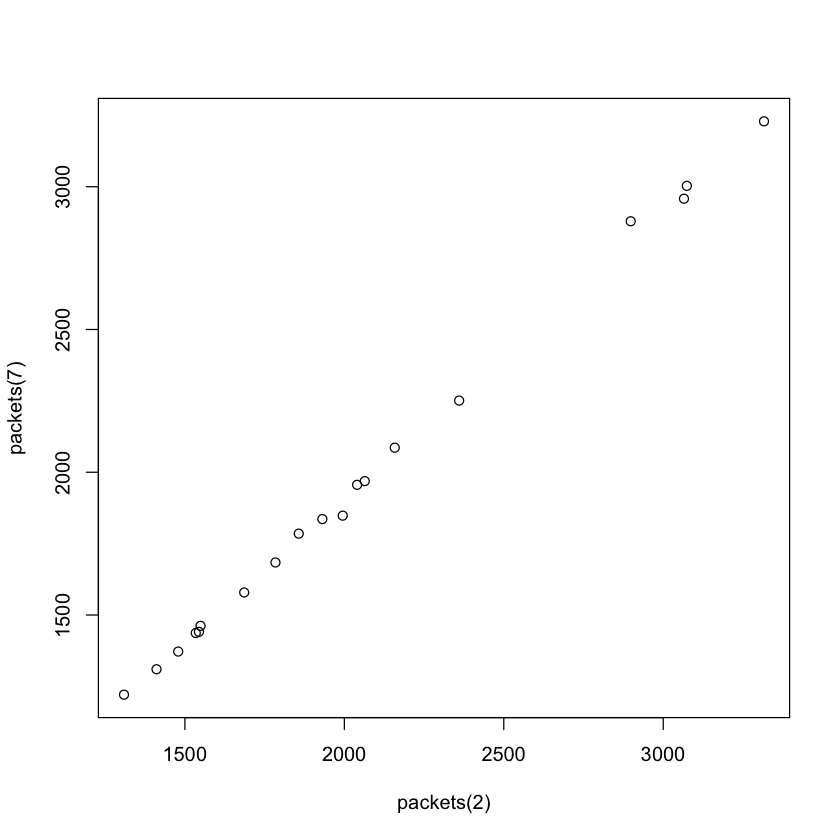

In [105]:
qqplot(packets(2),packets(7))

### Problem #10
This question does not use the data, but you need to produce an R program. Rather than record the full vector of data when computing a mean, you can use a pair of variables --  you simply record the sum of the terms in the vector (Sx) and the number of items (n) and then report Sx/n. Rearrange the equations equation for variance ( $ \sum_i^n (x_i - \bar x)^2 $ ) to demonstrate how you can compute the variance of an arbitrary number of data samples using a small, fixed number of variables, much as I demonstrated for computing the mean. Your solution will need to record three values from the data. You should show your derivation step-by-step. You can either do this using code (i.e. define a series of MyVar() functions that simplify expression into terms that don't involve the mean) or using math (notebooks support MathJax and LaTeX).

In [127]:
running.none = c(0,0,0)
running.var = function(new.x,old.var) {
    sum = old.var[1]
    count = old.var[2]
    ssquares = old.var[3]
    new.sum = sum + new.x
    new.count = count + 1
    new.ssquares = ssquares + new.x^2
    c(new.sum, new.count, new.ssquares)
}
var.ofrunning = function(current.var) {
    sum = current.var[1]
    count = current.var[2]
    ssquares = current.var[3]
    m = sum/count
    (ssquares + count*m^2 - 2*sum*m)/(count-1)
}
var(c(1,2,3,4,5))
var.ofrunning(running.var(5,running.var(4,running.var(3,running.var(2,running.var(1,running.none))))))

[1] 2.5

[1] 2.5